In [1]:
# Cell 1: Import ML Libraries

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

from xgboost import XGBClassifier

import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Cell 2: Load Dataset

df = pd.read_csv("../data/raw/uci-ml-phishing-dataset.csv")

df.head()


,id,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [3]:
# Cell 3: Drop ID column

df = df.drop(columns=["id"])

df.shape


(11055, 31)

In [4]:
# Cell 4: Define X and y

X = df.drop("Result", axis=1)
y = df["Result"]


In [5]:
# Cell 5: Convert Labels

y = y.map({-1: 0, 1: 1})

y.value_counts()


Result
1    6157
0    4898
Name: count, dtype: int64

In [6]:
# Cell 6: Split Data

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (8844, 30)
Test shape: (2211, 30)


In [7]:
# Cell 7: Scaling

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Cell 8: Logistic Regression

log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train_scaled, y_train)

y_pred_log = log_model.predict(X_test_scaled)

print("Logistic Regression Results:\n")
print(classification_report(y_test, y_pred_log))


Logistic Regression Results:

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       980
           1       0.92      0.95      0.94      1231

    accuracy                           0.93      2211
   macro avg       0.93      0.93      0.93      2211
weighted avg       0.93      0.93      0.93      2211



In [9]:
# Cell 9: Random Forest

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:\n")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       980
           1       0.97      0.98      0.98      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



In [10]:
# Cell 10: XGBoost

xgb_model = XGBClassifier(
    eval_metric="logloss",
    random_state=42
)

xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results:\n")
print(classification_report(y_test, y_pred_xgb))


XGBoost Results:

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       980
           1       0.97      0.98      0.98      1231

    accuracy                           0.97      2211
   macro avg       0.97      0.97      0.97      2211
weighted avg       0.97      0.97      0.97      2211



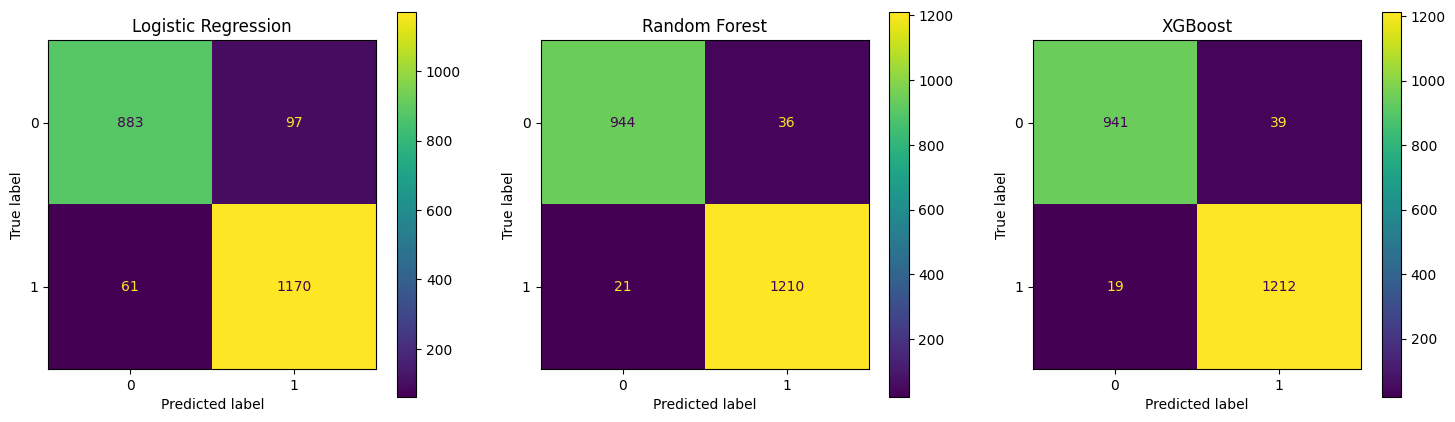

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_log, ax=axes[0])
axes[0].set_title("Logistic Regression")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, ax=axes[1])
axes[1].set_title("Random Forest")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb, ax=axes[2])
axes[2].set_title("XGBoost")
# SAVE BEFORE SHOW
plt.savefig("../results/figures/ConfusionMatrix.png", dpi=300, bbox_inches="tight")

plt.show()
